# Stellar spectra    A. Basic Line Formation  


Markus Bjørklund

***Instructions*** *This is the template for submitting SSA. Please update your name or student identifier above. Before you submit, make sure you delete all the markdown cells with text in italic (such as these instructions). Do not delete the questions themselves. Write your answers in the cells below the questions. While only one empty cell appears before the question blocks, feel free to add any quantity of cells (code or Markdown) in the order and quantity you see fit. You can also modify the header below to suit your needs, but please don't use any non-standard packages and do not load external code. The whole notebook must run without any errors in the code. In this first experiment with notebooks, there are no page / text limits. But please write concisely, and try to keep it short!*

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
from matplotlib import cm
from astropy import units as un
from astropy import constants as const
from astropy.visualization import quantity_support
from IPython.display import set_matplotlib_formats

quantity_support()
set_matplotlib_formats('svg')
plt.rc('legend', frameon=False)

## 1. Saha-Boltzmann calibration of the Harvard sequence ("Cecilia Payne")

## 1.1 Payne’s line strength diagram

## 1.2 The Boltzmann and Saha laws

* Inspect the hydrogen energy level diagram in section 1.2. Which transitions correspond to the hydrogen lines in the image with stellar spectrograms (section 1)? Which transitions share lower levels and which share upper levels?

* Payne's basic assumption was that the strength of the absorption lines observed in stellar spectra scales with the population density of the lower level of the corresponding transition. Why would she think so? (It is not correct, but generally stellar absorption lines do get stronger at larger lower-level population. In this exercise we follow her example and assume that the scaling is linear.)

* Use this expectation to give initial rough estimates of the strength ratios of the $\alpha$ lines in the the H I Lyman, Balmer, Paschen and Brackett series.


*Your answers here*

If we look at the energy level diagram in section 1.2, we see that the Balmer lines are represented. We have the $H \beta$, $H \gamma$ , $H \delta$, with transitions s $4\rightarrow 2$ , $5\rightarrow 2$ and $6\rightarrow 2$ respectively. None of the transitions share upper level, they all however share the lower level of $s=2$.

It is natural to think that the more electrons in a level, the more transitions must have happened to put the electrons there. Therefore, the line strength of the transitions would scale with the population density of the lower level. 

We can use Payne's assumption to estimate the line strength ratios. We use the relation that 

\begin{align*}
    \frac{n_{r,s}}{n_{r,t}} &= \frac{\frac{N_r}{U_r}g_{r,s}e^{-\frac{\chi_{r,s}}{kT}} }{\frac{N_r}{U_r}g_{r,s}e^{-\frac{\chi_{r,s}}{kT}}} \\
    &= \frac{g_{r,s}}{g_{r,t}} e^{-\frac{1}{kT}\left(\chi_{r,s} - \chi_{r,t}\right)}
\end{align*}

Now for neutral hydrogen, we have that $\chi_{1,s} = 13.598\left(1-\frac{1}{s^2}\right)$ and $g_{1,s} = 2s^2$. This gives us the result that the strength ratios can be found by 
\begin{equation}
    \frac{n_{r,s}}{n_{r,t}} = \frac{s^2}{t^2}e^{-\frac{13.598 eV}{kT}\left(\frac{1}{t^2} - \frac{1}{s^2}\right)}
\end{equation}

We can estimate the ratios with the code below, where we use the convention $t > s$.

In [2]:
def ratio(s,t,chi,T):
    value = s**2 / (t**2) * np.exp(-chi/(const.k_B*T) *(1/t**2 - 1/s**2) )
    return value

T = 5000 * un.K
chi = 13.598*un.eV

s_list = [1,2,3]
ratio_list = []
for s in s_list:
    for t in range(s+1,5):
        ratio_val = ratio(s,t,chi,T)
        print("%.1e" %ratio_val)
        ratio_list.append( ratio_val )

4.8e+09
1.7e+11
4.4e+11
3.6e+01
9.3e+01
2.6e+00


| Ratio            |         Value           |
|:------------------:|----------------------:|
| Lyman-Balmer     | $4.8\cdot10^{9}$        |
| Lyman-Paschen    | $1.7\cdot10^{11}$       |
| Lyman-Brackett   | $4.4\cdot10^{11}$       |
| Balmer-Paschen   | $35.6$                  |
| Balmer-Brackett  | $92.9$                  |
| Paschen-Brackett | $2.6$                   |

* Explain from equations (1) and (3) why the Saha and Boltzmann distributions behave differently for increasing temperature.
* Speculate how ionisation can fully deplete a stage while excitation puts only a few atoms in levels just below the ionisation level. Hint: what is the limit of the Saha and Boltzman ratios for infinite temperature?

We have the Boltzmann distribution defined as 

\begin{equation}
    \frac{n_{r,s}}{N_r} = \frac{g_{r,s}}{U_r} \mathrm{e}^{-\chi_{r,s}/kT}
\end{equation}

and the Saha distribution defined as 

\begin{equation}
   \frac{N_{r+1}}{N_r}
    = \frac{1}{N_e} \frac{2U_{r+1}}{U_r}
      \left(\frac{2 \pi m_e kT}{h^2}\right)^{3/2} 
      \mathrm{e}^{-\chi_r/kT}
\end{equation}

Now if we look at the limit where $T \rightarrow \infty$, we see that the exponential $\mathrm{e}^{-\chi_r/kT} \rightarrow 1$. Therefore, the Boltzmann distribution will tend towards a constant. Thus, it will become less and less temperature dependent at higher and higher temperatures. The Saha distribution will however tend towards infinity, since the Saha distribution still is proportional with $\propto T^{\frac{3}{2}}$. This also helps us understand how ionization can fully deplete a stage. The fact that the Saha distribution tends towards infinity is not because of the population $N_{r+1} \rightarrow \infty$ but rather that $N_r \rightarrow 0$, namely depleting the stage below, which is not possible by excitation, as shown from the Boltzmann distribution.

## 1.3 Saha-Boltzmann populations of a simplified Ca atom

### 1.3.1 Partition function 

### 1.3.2 Compute the level populations according to the Boltzmann law

### 1.3.3 Compute the ionisation fractions according to the Saha law

### 1.3.4 Put things on an atom class

* Using the simplified Ca atom (`Ca_atom.txt`), compute the partition functions $U_r$ for T=5000, 10000, and 20000 K. What can you say about the temperature dependence of $U_r$?

* Plot a "Payne curve" for the simplified Ca atom using the same temperature range (100 - 175.000 K) and electron pressure (100 Pa)

* Make a separate figure with a Payne curve for an element of your choice. You can choose one of the existing model atoms, or you can use the [NIST atomic spectra database](https://physics.nist.gov/PhysRefData/ASD/levels_form.html) to build a model for any atom you'd like. How does it compare with Ca?

In [3]:
class Atom:
    """
    Reads atomic data, calculates level populations according to Boltzmann's law,
    and ionisation fractions according to Saha's law.
    """
    
    def __init__(self, atomfile=None):
        """
        Parameters
        ----------
        atomfile : string, optional
            Name of file with atomic data. If not present, atomic data needs
            to be loaded with the .read_atom method.
        """
        self.loaded = False
        if atomfile:
            self.read_atom(atomfile)
        
    def read_atom(self, filename):
        """
        Reads atom structure from text file.
        
        Parameters
        ----------
        filename: string
            Name of file with atomic data.
        """
        tmp = np.loadtxt(filename, unpack=True)
        self.n_stages = int(tmp[2].max()) + 1
        # Get maximum number of levels in any stage
        self.max_levels = 0
        for i in range(self.n_stages):
            self.max_levels = max(self.max_levels, (tmp[2] == i).sum())
        # Populate level energies and statistical weights
        # Use a square array filled with NaNs for non-existing levels
        chi = np.empty((self.n_stages, self.max_levels))
        chi.fill(np.nan)
        self.g = np.copy(chi)
        for i in range(self.n_stages):
            nlevels = (tmp[2] == i).sum()
            chi[i, :nlevels] = tmp[0][tmp[2] == i]
            self.g[i, :nlevels] = tmp[1][tmp[2] == i]
        # Put units, convert from cm-1 to Joule
        chi = (chi / un.cm).to('aJ', equivalencies=un.spectral())
        # Save ionisation energies, saved as energy of first level in each stage
        self.chi_ion = chi[:, 0].copy()
        # Save level energies relative to ground level in each stage
        self.chi = chi - self.chi_ion[:, np.newaxis]
        self.loaded = True
        
    def compute_partition_function(self, temperature):
        """
        Computes partition functions using the atomic level energies and
        statistical weights.
        
        Parameters
        ----------
        temperature: astropy.units.quantity (scalar or array)
            Gas temperature in units of K or equivalent.
        """
        if not self.loaded:
            raise ValueError("Missing atom structure, please load atom with read_atom()")
        temp = temperature[np.newaxis, np.newaxis]  # to allow broadcast
        return np.nansum(self.g[..., np.newaxis] * 
                            np.exp(-self.chi[..., np.newaxis] / 
                                      const.k_B / temp), axis=1)
    
    def compute_excitation(self, temperature):
        """
        Computes the level populations relative to the ground state,
        according to the Boltzmann law.
        
        Parameters
        ----------
        temperature: astropy.units.quantity (scalar or array)
            Gas temperature in units of K or equivalent.
        """
        pfunc = self.compute_partition_function(temperature)
        # Reshape arrays to allow broadcast
        temp = temperature[np.newaxis, np.newaxis]
        g_ratio = self.g[..., np.newaxis] / pfunc[:, np.newaxis]  # relative to total number of atoms in this stage
        chi = self.chi[..., np.newaxis]
        return g_ratio * np.exp(-chi / (const.k_B * temp))
    
    def compute_ionisation(self, temperature, electron_pressure):
        """
        Computes ionisation fractions according to the Saha law.
        
        Parameters
        ----------
        temperature: astropy.units.quantity (scalar or array)
            Gas temperature in units of K or equivalent.
        electron_pressure: astropy.units.quantity (scalar)
            Electron pressure in units of Pa or equivalent.
        """
        partition_function = self.compute_partition_function(temperature)
        electron_density = electron_pressure / (const.k_B * temperature)
        saha_const = ((2 * np.pi * const.m_e * const.k_B * temperature) / 
                      (const.h ** 2)) ** (3 / 2)
        nstage = np.zeros_like(partition_function) / un.m ** 3
        nstage[0] = 1. / un.m ** 3
        # Below we use the values for ionisation energies that are saved
        # in the first index of each excited state: self.chi[r + 1, 0]
        for r in range(self.n_stages - 1):
            nstage[r + 1] = (nstage[r] / electron_density * 2 * saha_const *
                             partition_function[r + 1] / partition_function[r] * 
                             np.exp(-self.chi_ion[r + 1, np.newaxis] / 
                                       (const.k_B * temperature[np.newaxis])))
        # nansum is needed because the last stage might have only one level
        # (only ionisation potential)
        return nstage / np.nansum(nstage, axis=0)

    def compute_populations(self, temperature, electron_pressure):
        """
        Computes relative level populations for all levels and all
        ionisation stages using the Bolzmann and Saha laws.
        
        Parameters
        ----------
        temperature: astropy.units.quantity (scalar or array)
            Gas temperature in units of K or equivalent.
        electron_pressure: astropy.units.quantity (scalar)
            Electron pressure in units of Pa or equivalent.
        """
        return (self.compute_excitation(temperature) * 
                self.compute_ionisation(temperature, electron_pressure)[:, np.newaxis])

    def plot_payne(self, temperature, electron_pressure):
        """
        Plots the Payne curves for the current atom.
        
        Parameters
        ----------
        temperature: astropy.units.quantity (array)
            Gas temperature in units of K or equivalent.
        electron_pressure: astropy.units.quantity (scalar)
            Electron pressure in units of Pa or equivalent.
        """
        pops = self.compute_populations(temperature, electron_pressure)
        fig, ax = plt.subplots()
        ax.plot(np.tile(temp, (self.n_stages, 1)).T, pops[:, 0].T, 'b-')
        n_levels = self.chi.shape[1]
        if n_levels > 1:
            ax.plot(np.tile(temp, (self.n_stages, 1)).T, pops[:, 1].T, 'r--')
        if n_levels > 2:
            ax.plot(np.tile(temp, (self.n_stages, 1)).T, pops[:, 2].T, 'k:')
        ax.set_yscale('log')
        ax.set_ylim(1e-8, 1.1)
        ax.set_xlabel('Temperature (K)')
        ax.set_ylabel('Populations')

[[ 1.16887479  3.45978054 13.62723508]
 [ 2.19889031  3.55230978  6.70522905]
 [ 1.          1.          1.00001079]
 [ 4.8153548   5.2769924   5.59816828]
 [ 6.91356975  8.0815264   9.64653602]
 [ 2.          2.          2.        ]]


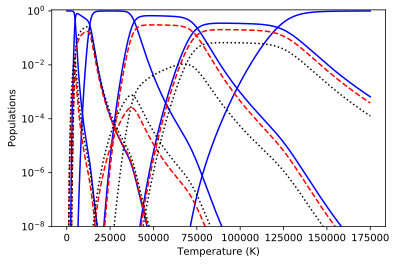

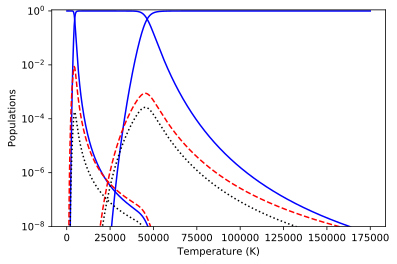

In [4]:
ca = Atom("Ca_atom.txt")
temp_list = [5000,10000,20000]*un.K

part_func = ca.compute_partition_function(temp_list)
print(part_func)

temp = np.linspace(100, 175000, 500) * un.K
e_press = 100 * un.Pa
ca.plot_payne(temp, e_press)

na = Atom("Na_atom.txt")
na.plot_payne(temp,e_press)

**Temperature dependence of U_r discussion**

**Comparison between Ca and Na here**

## 1.4 Saha-Boltzmann Populations of Hydrogen

* Using equations (4) and (5), create a model hydrogen atom with 100 levels and save it to a file with the same format. Compute the partition functions for both `H_atom.txt` and your 100-level model. How do they compare?

In [5]:
    f = open("simple_H.txt", "w")
    f.write("# E (cm^-1)   g      level" + "\n")
    for s in range(1,101):
        g = 2*s**2
        chi = 13.598*(1-1/s**2)*un.eV
        chi = chi.to("1/cm" , equivalencies=un.spectral())
        chi_val = chi.value
        name = '%-13.4f %-8s %-2s \n' %(chi_val,g,s)
        f.write(name)
    f.close()

In [6]:
simp_h = Atom("simple_H.txt")
h = Atom("H_atom.txt")

temp_list = [5000]*un.K

part_func1 = simp_h.compute_partition_function(temp_list)
part_func2 = h.compute_partition_function(temp_list)

print(part_func2)

[[2.]
 [1.]]


## 1.5 Solar Ca$^+$K versus H$\alpha$: line strength

* Explain qualitatively why the solar Ca$^+$ K line is much stronger than the solar H$\alpha$ line, even though hydrogen is not ionised in the solar photosphere and low chromosphere ($T \approx$ 4000 - 6000 K) where these lines are formed, and even though the solar Ca/H abundance ratio is only $N_\mathrm{Ca}/N_\mathrm{H} = 2 \times 10^{−6}$. Assume again that the observed line strength scales with the lower-level population density (which it does, although nonlinearly through a "curve of growth" as you will see in an exercise below).

* Prove your explanation by computing and plotting the expected strength ratio of these two lines as function of temperature for $P_e = 10^2$ dyne cm$^{-2}$. Make use of `H_atom.txt` and `Ca_atom.txt`.


The Calcium K line shows up as a much stronger line than the
H$\alpha$-line in solar type spectra, even though hydrogen is much
more abundant in the sun($N_\mathrm{Ca}/N_\mathrm{H} = 2 \times 10^{−6}$). This could seem contradictory to our hypothesis that line strength scales with population, however we must remember that the assumption was that line strength scaled with the population of the lower level of the transition. The Ca + K- line is a result of the transition s=2 to s=1, while the Hα-line is the result of a s=3 to s=2 transition. The calcium ground state is much more abundant than the s=2 energy level for hydrogen in this temperature range, as we see the H$\alpha$ abundance does not surpass Ca II K before around ~8000K.

(2, 5, 14001)
(6, 19, 14001)


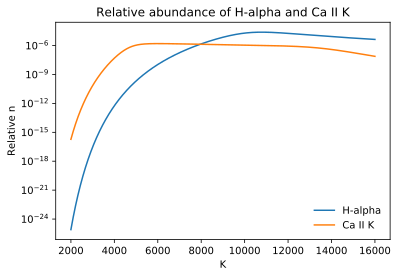

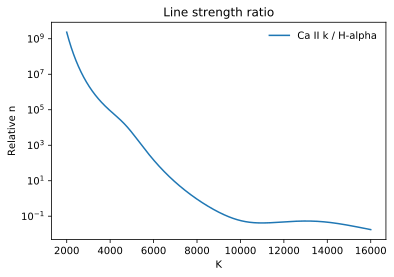

In [41]:
H = Atom("H_atom.txt")
Ca = Atom("Ca_atom.txt")

temp = np.linspace(2000, 16000, 14001) * un.K
e_press = 100 * un.Pa

H_pop = H.compute_populations(temp, e_press)
Ca_pop = Ca.compute_populations(temp, e_press)
temp_vec = temp.T

print(H_pop.shape)
print(Ca_pop.shape)

#Relative pop. of H with r=1, s=2
Halpha = H_pop[0,1,: ].T 

#Relative pop. of Ca with r=2, s=1. 
Ca2k = Ca_pop[1,0,: ].T 

#Accounting for abundance by factor 2*10^-6
ratio = Ca2k *2*1e-6 / Halpha

plt.figure()
plt.title("Relative abundance of H-alpha and Ca II K")
plt.semilogy(temp_vec,Halpha,label="H-alpha")
plt.semilogy(temp_vec,Ca2k*2*1e-6,label="Ca II K")
plt.ylabel("Relative n")
plt.legend()
plt.show()

plt.figure()
plt.title("Line strength ratio")
plt.semilogy(temp_vec,ratio)
plt.ylabel("Relative n")
plt.legend(["Ca II k / H-alpha"])
plt.show()

## 1.6 Solar Ca$^+$K versus H$\alpha$: temperature sensitivity

* Plotting the relative population changes $(\Delta n_\mathrm{Ca} / \Delta T) / n_\mathrm{Ca}$ and $(\Delta n_\mathrm{H} /  \Delta T) / n_\mathrm{H}$ for the lower levels of Ca$^+$K and H$\alpha$, using $\Delta T=$ 1 K.

* Around $T=$ 5600 K the Ca$^+$K curve dips down to very  small values; the H$\alpha$ curve does that around $T=$ 9500  K. Thus, for $T \approx$ 5600 K the temperature sensitivity of Ca$^+$K is much smaller than the temperature sensitivity of H$\alpha$. Each dip has a $\Delta n > 0$ and a $\Delta n < 0$ flank.  Which is which? (The dips can be diagnosed by overplotting the variation with temperature of each population in relative units.) 

* Explain each flank of the two population curves and the dips in the two temperature sensitivity curves.

* Find at which temperature the hydrogen in stellar photospheres with $P_e =$ 10 Pa is about 50% ionised. Plot the neutral and ionised fractions of hydrogen as a function of temperature.

**(I wasn't quite sure about the result, since I thought I had it right but it looked completely different from the SSA notebook, so I've included both plots. I've also cheated a bit with the abundance for clarity on the bottom most plot)**

One can think of this as a numerical approximation to a normalized derivative of the population, with respect to temperature. I.E. how much the population changes when the temperature changes. A high value would then mean the population changes a lot with temperature, and vice versa.
We plot it together with the relative populations, to show the correlation.

As the population increases on the left flank, we should have
$\Delta n > 0$ here, and similarly $\Delta < 0 $ on the right flank where the population decreases. We see that the dip in temperature sensitivity coincides with the max of the relative population. This suggests that larger populations are less sensitive to temperature change. This makes sense, as a smaller population would be more heavily affected by an energy change in the system, in the form of a temperature change. (As in percentage wise since it is normalized. One electron getting excited as the result of a temperature change makes a bigger impact on a population of 3 electrons than a population of 1000 electrons).

The divide between hot and cool stars marks a change in the
mechanism in stars that produce the stellar spectra. In hot stars, Thomson scattering of photons off of free electrons from ionized hydrogen dominates the formation of the stellar continuum. In cool stars, the formation is dominated by interactions between free electrons, from other elements with lower ionization energy, and neutral hydrogen 1. 
It would therefore be of interest to investigate for which temperature we have 50 percent ionization for
hydrogen. We find that this temperature is T = 9218K.

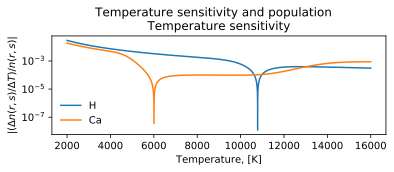

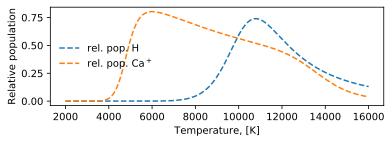

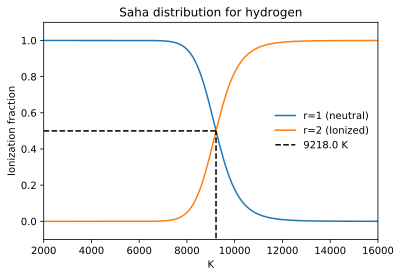

In [60]:
#Temp. vec defined in steps of 1K for simplicity, such that
#we don't need to compute the populations again
#(Halpha[i+1] - Halpha[i] corresponds to 
#Halpha(temp[i]) - Halpha(temp[i] - 1K))

dT = 1.
dnH_dT = np.zeros(Halpha.shape)
dnCa_dT = np.zeros(Ca2k.shape)

for i in range(1,len(Halpha)):
    dnH_dT[i] = ( Halpha[i] - Halpha[i-1] ) / (dT*Halpha[i])
    dnCa_dT[i] = ( Ca2k[i] - Ca2k[i-1] ) / (dT*Ca2k[i])

plt.figure()
#Excluding first element, because derivative not clearly
#defined at edge
plt.subplot(2,1,1)
plt.suptitle('Temperature sensitivity and population')
plt.plot(temp[1:],np.absolute(dnH_dT[1:]), label="H")
plt.plot(temp[1:],np.absolute(dnCa_dT[1:]), label="Ca")
plt.yscale('log')
plt.legend()
plt.title('Temperature sensitivity')
plt.xlabel('Temperature, [K]')
plt.ylabel(r"$\left| \left( \Delta n(r,s) / \Delta T \right) /  n(r,s) \right|$")
plt.show()

plt.subplot(2,1,2)
plt.plot(temp[1:],Halpha[1:]*3e4,ls='--',  label = 'rel. pop. H')
plt.plot(temp[1:],Ca2k[1:], ls='--', label = r'rel. pop. Ca$^+$')
plt.xlabel('Temperature, [K]')
plt.ylabel('Relative population')
plt.legend()
plt.show()

#Ionization. Object is already created in a cell above.
e_press = 10 * un.Pa
H_ion_frac = H.compute_ionisation(temp,e_press)
#ionisation

#Finding temp where fraction is 0.5
value = 0.5
idx = (np.abs(H_ion_frac-value)).argmin()
crit_temp = str(temp[idx])

plt.figure()
plt.plot(temp,ion[0], label="r=1 (neutral)")
plt.plot(temp,ion[1], label="r=2 (Ionized)")
plt.plot([temp[idx].value, temp[idx].value], [-0.5, 0.5], 'k--')
plt.plot([1000, temp[idx].value], [0.5, 0.5], 'k--', label=crit_temp)
plt.legend()
plt.xlim(temp[0],temp[-1])
plt.ylim(-0.1,1.1)
plt.ylabel("Ionization fraction")
plt.title("Saha distribution for hydrogen")
plt.show()

In [ ]:
e_press = 10 * un.Pa
temp = np.linspace(2000, 12000, 100) * un.K
dT = 1 * un.K

ca_atom = Atom("Ca_atom.txt")
n_ca1 = ca_atom.compute_populations(temp, e_press)[1, 0]
n_ca2 = ca_atom.compute_populations(temp - dT, e_press)[1, 0]
diff_ca = (n_ca1 - n_ca2) / (dT * n_ca1)

h_atom = Atom("H_atom.txt")
n_h1 = h_atom.compute_populations(temp, e_press)[0, 1]
n_h2 = h_atom.compute_populations(temp - dT, e_press)[0, 1]
diff_h = (n_h1 - n_h2) / (dT * n_h1)

fig, ax = plt.subplots(nrows=2)
ax[0].plot(temp, np.abs(diff_h), label=r'H')
ax[0].plot(temp, np.abs(diff_ca), label=r'Ca$^+$K')
ax[0].legend()
ax[0].set_ylabel(r'$(\Delta n_i / \Delta T) / n_i$')

#ax[1].plot(temp, n_h1 / n_h1.max(), '--',  label='H')
#ax[1].plot(temp, n_ca1 / n_ca1.max(), '--', label=r'Ca$^+$')
ax[1].plot(temp, n_h1 , '--',  label='H')
ax[1].plot(temp, n_ca1 , '--', label=r'Ca$^+$')

ax[1].set_yscale('log')
ax[1].legend()
ax[1].set_ylabel('Relative populations')
ax[1].set_xlabel('Temperature (K)');

## 2. Fraunhofer line strengths and the curve of growth ("Marcel Minnaert")

    
### 2.1 The Planck law

* Plot the Planck function $B_\lambda$ for 100 $< \lambda <$ 2000 nm for a range of temperatures (5000 to 8000 K). Use a log scale for both the x and y axes. Explain the slopes of the righthand part.

*Your answers here*

### 2.2 Radiation through an isothermal layer

* Use equation (11) to calculate the radiation through an isothermal layer. Make plots of $I_\lambda$ for the different values of $I_\lambda(0)$, using the following values:

``` python
b_lambda = 2
tau = np.logspace(-2, 1, 100)
i0 = np.arange(5)
```
    
* How does $I_\lambda$ depend on $\tau$ for $\tau \ll 1$ when $I_\lambda(0) =0$ (hint: use a log scale in the x and y axes to study the behavior at small $\tau$)?  And when $I_\lambda(0) > B_\lambda$? Such a layer with $\tau \ll 1$ is called "optically thin", why? Would "radiatively thin" be a better name?
 
* A layer is called "optically thick" when it has $\tau \gg 1$. Why? The emergent intensity becomes independent of $\tau$ for large $\tau$. Can you explain why this is so in physical terms? 

*Your answers here*

## 2.3 Spectral lines from a solar reversing layer


### 2.3.1 Schuster-Schwarzschild model

### 2.3.2 Voigt profile

### 2.3.3 Emergent line profiles

* Compute and plot the emergent line profiles using a Schuster-Schwarzschild model, using the code provided. Try changing the parameters (`temp_surface`, `temp_layer`, `a`, `tau0`) to see if you can obtain a saturated line profile (flat bottom). Which parameter(s) are more important in determining this?

* Make a plot of line profiles with different $\tau_0$, using `tau0 = 10 ** np.linspace(-2, 2, 9)`. How do you explain the profile shapes for $\tau(0) \ll 1$? Why is there a low-intensity saturation limit for $\tau \gg 1$? Why do the line wings develop only for very large $\tau(0)$? Where do the wings end? For which values of $\tau(0)$ is the layer optically thin, respectively optically thick, at line center? And at $u=5$?

* Now study the dependence of these line profiles on wavelength by repeating the above for $\lambda=$ 200 nm (ultraviolet) and $\lambda=$ 1000 nm (near infrared). What sets the top value $I_{\rm cont}$ and the limit value reached at line center by $I(0)$? Check these values by computing them directly. What happens to these values at other wavelengths?  

* Make a figure with plots for the above: line profiles for several values of $\tau_0$, and the three different wavelengths (200, 500, and 1000 nm). However, normalise each line profile by its continuum intensity: `intensity /= intensity[0]` (observed spectra are usually normalised this way because absolute calibrations are often missing). Explain the wavelength dependencies in this plot.

*Your answers here*

## 2.4 The equivalent width of spectral lines


## 2.5 The curve of growth

* Compute and plot a curve of growth by plotting $W_\lambda$ against $\tau_0$ on a log-log plot. Explain what happens in the three different parts.  

* The first part has slope 1:1, the third part has slope 1:2 in this log-log plot.  Why?

* Which parameter controls the location of the onset of the third part? Give a rough estimate of its value for solar iron lines through comparison with the given figure from Wright (1948).

* Which parameter should you increase to produce emission lines instead of absorption lines? Change it accordingly and modify the code to produce emission profiles and an emission-line curve of growth. (To avoid taking the log of negative $W_\lambda$, plot the absolute value of $W_\lambda$.)

*Your answers here*